In [1]:
Pkg.checkout("TaylorIntegration", "jp/wild-experiment")

INFO: Checking out TaylorIntegration jp/wild-experiment...
INFO: Pulling TaylorIntegration latest jp/wild-experiment...
INFO: No packages to install, update or remove


In [2]:
using TaylorIntegration, PyPlot

In [3]:
diffeq(t, x) = x.^2

diffeq (generic function with 1 method)

In [32]:
function diffeq2!(t, x, xdot)
    xdot[1] = x[1]^2
    xdot[2] = x[2]^2
end

function diffeq1!(t, x, xdot)
    xdot[1] = x[1]^2
end

diffeq1! (generic function with 1 method)

In [40]:
@time tT, xT = TaylorIntegration.taylorinteg2(diffeq1!, [3.0], 0.0, 0.34, 28, 1e-20, maxsteps=100);

  0.001413 seconds (18.63 k allocations: 1.508 MB)


In [27]:
tT

101-element SubArray{Float64,1,Array{Float64,1},Tuple{UnitRange{Int64}},true}:
 0.0      
 0.0581389
 0.105798 
 0.144927 
 0.177101 
 0.203596 
 0.225447 
 0.243494 
 0.258421 
 0.270784 
 0.281038 
 0.289555 
 0.296637 
 ⋮        
 0.333333 
 0.333333 
 0.333333 
 0.333333 
 0.333333 
 0.333333 
 0.333333 
 0.333333 
 0.333333 
 0.333333 
 0.333333 
 0.333333 

In [28]:
xT

101×2 SubArray{Float64,2,Array{Float64,2},Tuple{UnitRange{Int64},Colon},false}:
  3.0         3.0      
  3.63379     3.63379  
  4.39492     4.39492  
  5.30767     5.30767  
  6.40071     6.40071  
  7.70789     7.70789  
  9.26904     9.26904  
 11.131      11.131    
 13.349      13.349    
 15.9874     15.9874   
 19.1223     19.1223   
 22.8422     22.8422   
 27.251      27.251    
  ⋮                    
  1.35506e6   1.35506e6
  1.51858e6   1.51858e6
  1.70098e6   1.70098e6
  1.90432e6   1.90432e6
  2.13092e6   2.13092e6
  2.38329e6   2.38329e6
  2.66425e6   2.66425e6
  2.97688e6   2.97688e6
  3.3246e6    3.3246e6 
  3.71117e6   3.71117e6
  4.14073e6   4.14073e6
  4.61784e6   4.61784e6

In [29]:
tT[end]-tT[end-1]

2.4952030275304793e-8

In [30]:
tT[end]

0.3333331167818043

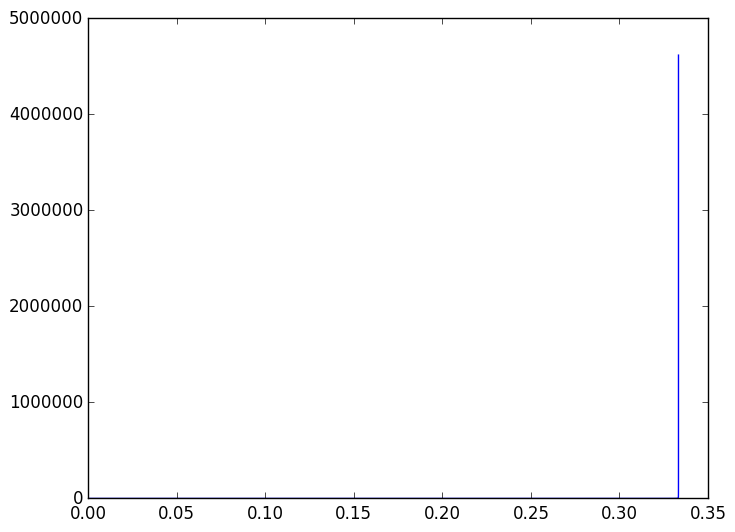

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x32927b950>

In [41]:
plot(tT,xT)

In [42]:
exactsol(t, x0) = x0./(1.0-x0.*t) #analytical solution

exactsol (generic function with 1 method)

In [49]:
#error relative to analytical solution
δxT = (xT-exactsol(tT, 3.0))./exactsol(tT, 3.0)

101×1 Array{Float64,2}:
  0.0        
  0.0        
  0.0        
  0.0        
  0.0        
  2.3046e-16 
  3.83288e-16
  3.19172e-16
  1.33071e-16
  5.55547e-16
 -5.57368e-16
 -4.66599e-16
 -5.21481e-16
  ⋮          
  7.36056e-11
  1.01051e-10
  7.06663e-11
  6.2487e-11 
  7.83341e-11
  1.30175e-10
  7.785e-11  
 -2.4396e-11 
  1.86123e-10
  2.46261e-10
  1.92492e-10
  3.70499e-10

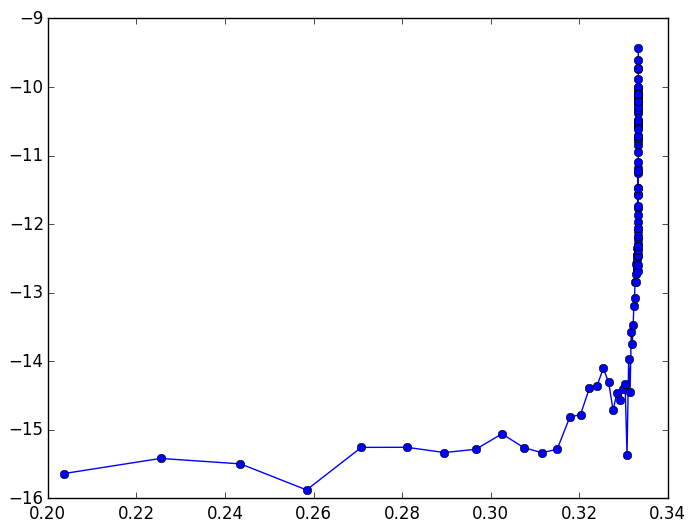

In [50]:
plot(tT, log10(abs(δxT)), "o-");